In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [43]:
delays = pd.read_csv('delays.csv',parse_dates=[['year', ' month']])
delays.columns

Index(['year_ month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [29]:
delays.head(10)

,year_ month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2004-01-01,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,51.58,...,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,2004-01-01,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,34.25,...,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,2004-01-01,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,51.86,...,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,2004-01-01,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,39.39,...,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,2004-01-01,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,21.89,...,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN
5,2004-01-01,DL,Delta Air Lines Inc.,PNS,"Pensacola, FL: Pensacola International",181.0,42.0,10.48,1.06,11.87,...,18.58,2.0,0.0,1814.0,469.0,195.0,365.0,0.0,785.0,NaN
6,2004-01-01,DL,Delta Air Lines Inc.,PSC,"Pasco/Kennewick/Richland, WA: Tri Cities",10.0,3.0,1.40,1.00,0.60,...,0.00,1.0,0.0,233.0,32.0,189.0,12.0,0.0,0.0,NaN
7,2004-01-01,DL,Delta Air Lines Inc.,PSP,"Palm Springs, CA: Palm Springs International",31.0,2.0,1.00,0.00,0.46,...,0.54,0.0,0.0,46.0,20.0,0.0,12.0,0.0,14.0,NaN
8,2004-01-01,DL,Delta Air Lines Inc.,PVD,"Providence, RI: Theodore Francis Green State",216.0,42.0,17.00,0.43,17.06,...,7.51,3.0,0.0,1820.0,889.0,12.0,595.0,0.0,324.0,NaN
9,2004-01-01,DL,Delta Air Lines Inc.,PWM,"Portland, ME: Portland International Jetport",122.0,21.0,8.14,0.00,8.06,...,4.80,2.0,0.0,809.0,284.0,0.0,278.0,0.0,247.0,NaN


In [9]:
delays['late_aircraft_ct'].value_counts()

0.00      26842
1.00       7318
2.00       3168
3.00       1808
4.00       1126
          ...  
198.13        1
627.64        1
384.28        1
87.36         1
127.20        1
Name: late_aircraft_ct, Length: 21488, dtype: int64

In [10]:
delays.year.value_counts()

2019    20946
2018    20231
2007    19518
2008    18967
2006    18090
2009    17687
2010    17575
2005    17024
2004    16705
2013    16089
2011    15585
2012    14387
2014    13980
2015    13528
2017    12518
2016    12217
2003     8763
Name: year, dtype: int64

In [16]:
delays.arr_del15.value_counts()

5.0       6499
6.0       6494
8.0       6494
4.0       6446
7.0       6442
          ... 
1555.0       1
3121.0       1
1493.0       1
3268.0       1
2047.0       1
Name: arr_del15, Length: 2297, dtype: int64

In [27]:
delays.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object

In [51]:
delays_copy = delays.copy()

In [64]:
delays_copy = delays_copy.drop(columns='Unnamed: 21')

In [65]:
delays_copy.fillna(0,inplace=True)

In [66]:
delays_copy.head()

,year_ month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004-01-01,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650,126,21.06,6.44,51.58,1.0,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004-01-01,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314,61,14.09,2.61,34.25,0.0,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0
2,2004-01-01,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513,97,27.60,0.42,51.86,0.0,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0
3,2004-01-01,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334,78,20.14,2.02,39.39,0.0,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0
4,2004-01-01,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217,47,8.08,0.44,21.89,0.0,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0


In [67]:
delays_copy.arr_flights = delays_copy.arr_flights.astype(int)

In [68]:
delays_copy.dtypes

year_ month            datetime64[ns]
carrier                        object
carrier_name                   object
airport                        object
airport_name                   object
arr_flights                     int64
arr_del15                       int64
carrier_ct                    float64
 weather_ct                   float64
nas_ct                        float64
security_ct                   float64
late_aircraft_ct              float64
arr_cancelled                 float64
arr_diverted                  float64
 arr_delay                    float64
 carrier_delay                float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
dtype: object

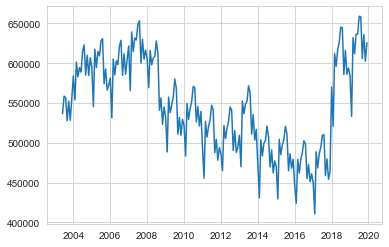

In [76]:
plt.plot(delays_copy.groupby('year_ month').sum()['arr_flights'])